# Strategy Pattern: Measure Loss vs. Time and Number of Samples

Now that we have a basis for comparing models for regression, why not just try a bunch and pick the best one? In fact, this will be an approach that we take from now on, whenever we have multiple models available to us. In this part, we're going to design some experimental protocols that will let us formally compare different models. This will also give us practice using plots of performance as a tool for understanding individual algorithms.

While we could just take a single measure of performance and be done, this may not give us the whole story on an algorithm. Generally, we care about two quantities: _data efficiency_ and _time efficiency_. Good data efficiency means that a model performs well with as few datapoints as possible. As a counter-example, I might be able to predict someone's age from their face if I met literally every person in the world, but that clearly isn't that useful. Good time efficiency means that the model achieves good performance on a fixed set of data quickly. Many models introduce trade-offs between time efficiency and data efficiency.

# Boosting
# Random Forests
# K-NN

https://github.com/tqdm/tqdm

# Assignment:
1. Plot performance vs. time for AdaBoost (using random forests). Pick a cutoff number of models.
2. Plot Performance vs. Number of Input Points for K-NN and AdaBoost.
3. Plot Time vs. Number of Input Points for K-NN, Adaboost, and Ridge Regression.

# Stretch Goals:
- Run the tests multiple times and compute means and standard deviations. Plot 95% confidence regions around each curve.
- Run the experiment with other regression models from sklearn.

In [1]:
%matplotlib inline
import numpy as np
from tqdm import tnrange
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import time

data = np.loadtxt('../Part 1/test_data.csv', delimiter=',')

x = np.array(data[:,0]).reshape(-1, 1)
y = data[:,2]

In [2]:
time.time()

1571671151.8045619

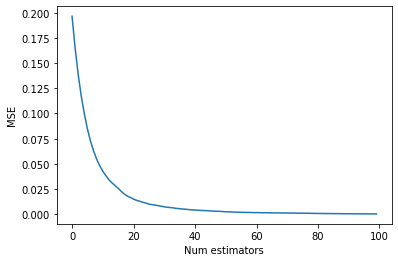

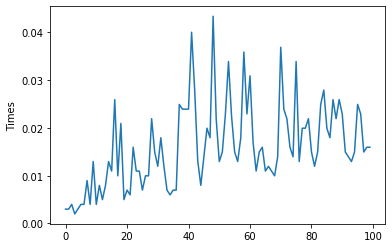

In [3]:
t = tnrange(100)
times = []
accuracies = []
for i in t:
    t0 = time.time()
    model = GradientBoostingRegressor(n_estimators=i+1)
    model.fit(x, y)
    predictions = model.predict(x)
    accuracies.append(mean_squared_error(y, predictions))
    t1 = time.time() - t0
    times.append(t1)
    
plt.figure()
plt.plot(range(100), accuracies)
plt.ylabel('MSE')
plt.xlabel('Num estimators')
plt.figure()
plt.plot(range(100), times)
plt.ylabel('Times')
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsRegressor

def run_knn(x, y):    
    t0 = time.time()
    
    nreg = KNeighborsRegressor(n_neighbors=2)
    
    nreg.fit(x, y)
    predictions = nreg.predict(x)
    mse = mean_squared_error(y, predictions)
    t1 = time.time() - t0
    return mse, t1

In [15]:
def run_boost(x, y):  
    t0 = time.time()
    
    nboost = GradientBoostingRegressor(n_estimators=20)
    
    nboost.fit(x, y)
    predictions = nboost.predict(x)
    mse = mean_squared_error(y, predictions)
    t1 = time.time() - t0
    return mse, t1

In [16]:
l = np.arange(2, len(x))

mse_knn = []
time_knn = []
for i in l:
    mse, thistime = run_knn(x[0:i], y[0:i])
    mse_knn.append(mse)
    time_knn.append(thistime)
    
    

In [17]:
mse_boost = []
time_boost = []
for i in l:
    mse, thistime = run_boost(x[0:i], y[0:i])
    mse_boost.append(mse)
    time_boost.append(thistime)
    

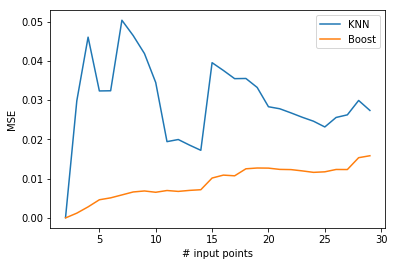

In [20]:
plt.figure()
plt.plot(l, mse_knn, label="KNN")
plt.plot(l, mse_boost, label="Boost")
plt.xlabel('# input points')
plt.ylabel('MSE')
plt.legend()


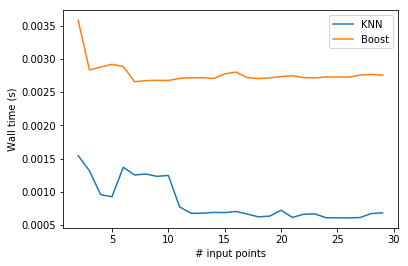

In [21]:
plt.figure()
plt.plot(l, time_knn, label="KNN")
plt.plot(l, time_boost, label="Boost")
plt.xlabel('# input points')
plt.ylabel('Wall time (s)')
plt.legend()